# Misc Viz
In this notebook we build a figure to compare CORAL's performance to several baselines. 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
READABLE_LABELS = ["STAGE_PAD","WRANGLE","EXPLORE","MODEL","EVALUATE","IMPORT"]
ORDERED_LABELS = ["IMPORT","WRANGLE","EXPLORE","MODEL","EVALUATE","STAGE_PAD"]
READABLE_LABEL_TO_INT = dict(zip(READABLE_LABELS,range(len(READABLE_LABELS))))

In [3]:
def save_for_pub(path):
    plt.savefig(path,bbox_inches="tight",transparent = True)

In [4]:
baseline_accuracies = pd.DataFrame([["Expert Heuristics", 0.3380,  (0.3164, 0.3597)],
                                    ["LDA+Weak Supervision", 0.4348, (0.4121, 0.4575)],
                                    ["CORAL"  , 0.7033,  (0.6824, 0.7242)]],
                                       columns = ["Model","Accuracy","Error Bars"]).sort_values("Accuracy",ascending = False)
                                    
ablation_accuracies = pd.DataFrame([["CORAL"  ,0.7033,  (0.6824, 0.7242)],
                                    ["CORAL \n(no markdown)",  0.6022, (0.5798, 0.6246)],
                                    ["CORAL \n(no unsupervised topic model)", 0.6246 , (0.6029, 0.6476)],
                                    ["CORAL \n(75% weak supervision)",  0.5793, (0.5568, 0.6019)],
                                    ["CORAL \n(50% weak supervision)",  0.4641 , (0.4413, 0.4869)],
                                    ["CORAL \n(25% weak supervision)",  0.4163,  (0.3938 ,0.4388)]], 
                         columns = ["Model","Accuracy","Error Bars"]).sort_values("Accuracy",ascending = False)

In [5]:
baseline_accuracies["error_size"] = baseline_accuracies.apply(lambda x: (x["Accuracy"] - x["Error Bars"][0]), axis = 1)
ablation_accuracies["error_size"] = ablation_accuracies.apply(lambda x: (x["Accuracy"] - x["Error Bars"][0]), axis = 1)

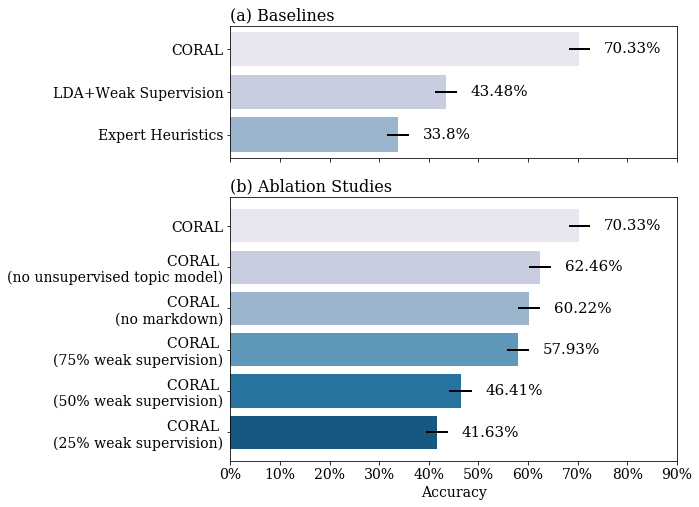

In [6]:
def bars_with_labels_and_errors(df,palette = "GnBu_d", ax = None):
    sns.barplot(data = df, y = "Model", x = "Accuracy",
               palette = palette, ax=ax)

    plt.ylabel(None)
#     plt.xlabel("")
    plt.xlim(0,0.9) 
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # set individual bar lables using above list
    for i,patch in enumerate(ax.patches):
        # get_width pulls left or right; get_y pushes up or down
        
        bar_end_x = patch.get_width()
        bar_middle_y = patch.get_y() + patch.get_height() /2
        
        accuracy = df.iloc[i]["Accuracy"]
        ax.text(bar_end_x + 0.05, bar_middle_y, \
                str(round((accuracy)*100, 2))+'%',
                verticalalignment='center')

        error_size = df.iloc[i]["error_size"]
        ax.errorbar(xerr = error_size, x = bar_end_x, y = bar_middle_y, c= "black")

        
# barplot_palette = sns.light_palette((260, 75, 60), input="husl")
barplot_palette = sns.color_palette("PuBu")
with plt.style.context("publications.mplstyle"):
#     fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
    fig = plt.figure(figsize=(8, 8)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2]) 
   
    ax1 = plt.subplot(gs[0])
    bars_with_labels_and_errors(baseline_accuracies, ax = ax1, palette = barplot_palette)

    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_title("(a) Baselines", loc = "left")
    plt.setp(ax1.get_xticklabels(), visible=False)
    
   
    ax2 = plt.subplot(gs[1],sharex = ax1)
    ax2.set_title("(b) Ablation Studies", loc = "left")
    bars_with_labels_and_errors(ablation_accuracies, ax = ax2, palette = barplot_palette)
    
    save_for_pub("figs/model_performance_with_baselines.pdf")

In [7]:
sns.color_palette("PuBu")

[(0.9112802768166091, 0.894717416378316, 0.9429296424452134),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.5687043444828912, 0.7082660515186466, 0.8390772779700115),
 (0.31378700499807766, 0.6058439061899269, 0.7776239907727797),
 (0.07537101114955785, 0.4756324490580546, 0.7084044598231449),
 (0.01619377162629758, 0.3641061130334487, 0.5707035755478662)]

In [8]:
id(ax2)

140204373507264